<a href="https://colab.research.google.com/github/gabrielduarteds/introducao-a-data-science/blob/main/introducao_a_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando as notas em geral

In [2]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape

(100836, 4)

In [5]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [8]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [12]:
print("Média", notas['nota'].mean())
print("Mediana", notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


In [10]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

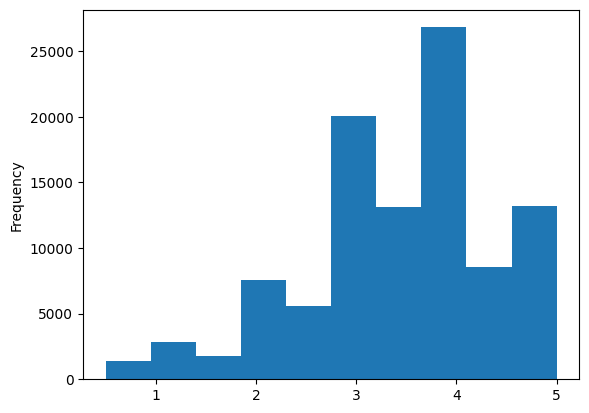

In [11]:
notas.nota.plot(kind='hist')

In [13]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: >

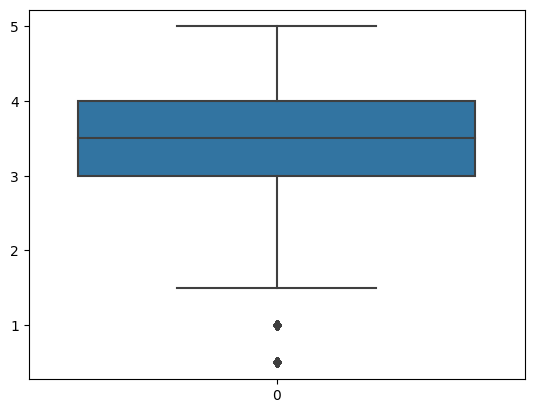

In [14]:
import seaborn as sns

sns.boxplot(notas.nota)

# Olhando os filmes

In [17]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando algumas notas específicas por filme


In [20]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [21]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [32]:
# medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme = notas.groupby("filmeId").mean()["nota"]

medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

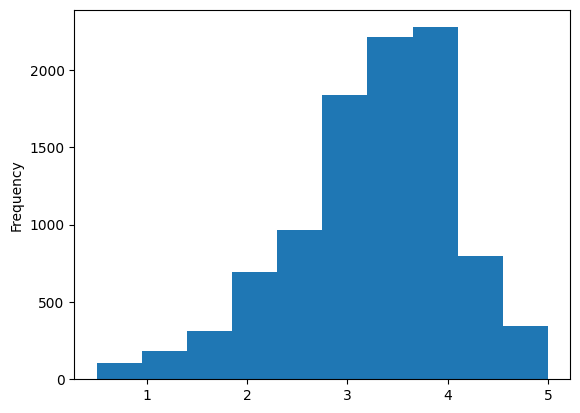

In [26]:
medias_por_filme.plot(kind='hist')

<Axes: xlabel='nota'>

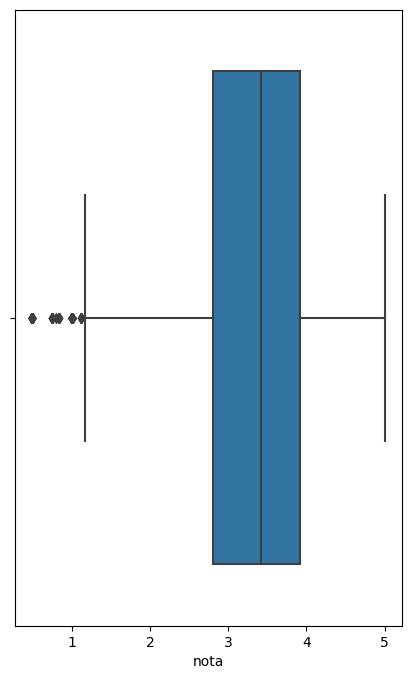

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(x=medias_por_filme)

In [34]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota', ylabel='Count'>

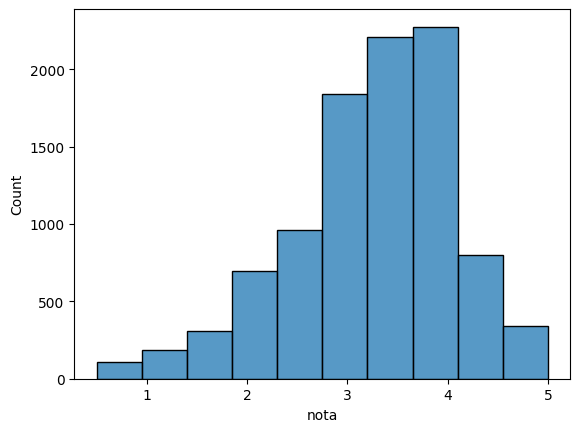

In [37]:
sns.histplot(medias_por_filme, bins=10)

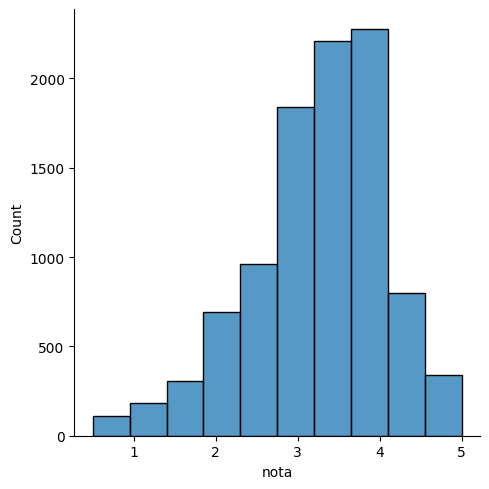

In [40]:
sns.displot(medias_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

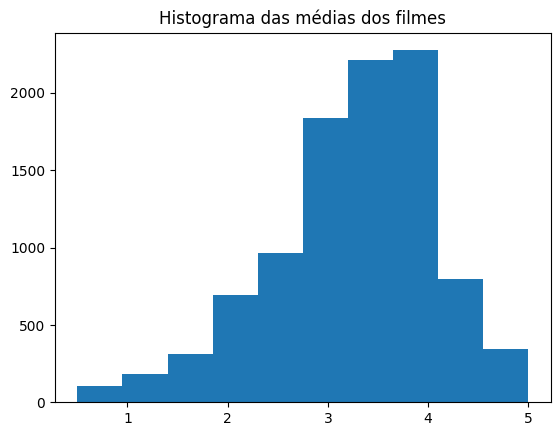

In [42]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")